----------
**Breast Cancer Analysis and Prediction**
=====================================

***Recall = 1. Precision = .92 Accuracy =  .971***

----------

- <a href='#1'>1. Load libraries and read the data</a>  
    - <a href='#1.1'>1.1. Load libraries</a> 
    - <a href='#1.2'>1.2. Read the data</a> 
    - <a href='#1.3'>1.3. Missing values</a> 
    - <a href='#1.4'>1.4. Reassign target and drop useless features</a> 
- <a href='#2'>2. Exploratory Data Analysis (EDA)</a> 
    - <a href='#2.1'>2.1. Head and describe</a> 
    - <a href='#2.2'>2.2. Target distribution (number and %)</a> 
    - <a href='#2.3'>2.3. Features distribution (hue = diagnosis)</a> 
    - <a href='#2.4'>2.4. Correlation matrix</a> 
    - <a href='#2.6'>2.5. Positive correlated features</a> 
    - <a href='#2.7'>2.6. Uncorrelated features</a> 
    - <a href='#2.7'>2.7. Negative correlated features</a> 
- <a href='#3'>3. Principal Component Analysis</a>
    - <a href='#3.1'>3.1. Compute PCA</a> 
    - <a href='#3.2'>3.2. PCA pie plot with 6 components (88.8%)</a> 
    - <a href='#3.2'>3.3. PCA scatter plot with 2 components (63.3%)</a> 
    - <a href='#3.3'>3.4. PCA scatter plot with 3 components (72.7%)</a>
- <a href='#4'>4. Define functions</a>
    - <a href='#4.1'>4.1. Confusion matrix and show metrics</a> 
    - <a href='#4.2'>4.2. Precision – Recall curve</a> 
    - <a href='#4.3'>4.3. ROC curve</a> 
    - <a href='#4.4'>4.4. Learning curve</a> 
    - <a href='#4.5'>4.5. Cross validation metrics</a> 
- <a href='#5'>5. Prepare dataset</a>
    - <a href='#5.1'>5.1. Define (X,  y)</a> 
    - <a href='#5.2'>5.2. Standard scaler (X)</a> 
    - <a href='#5.3'>5.3. Train test split</a> 
- <a href='#6'>6. Predictive model : Logistic Regression</a> 
    - <a href='#6.1'>6.1. Logistic Regression  and GridSearch CV to optimise hyperparameters (accuracy)</a> 
    - <a href='#6.2'>6.2. RFE : Recursive features elimination (30 features => 15 features)</a> 
    - <a href='#6.3'>6.3. Compare learning curves and cross validation scores</a> 
    - <a href='#6.4'>6.4. Select threshold for a recall = 100% (all malignant tumors detected)</a> 
    - <a href='#6.5'>6.5. Predicting with recall = 100%</a> 
- <a href='#7'>7. Predictive model 2 : Ensemble Classifier to maximise precision and detect all malignant tumors</a>
    - <a href='#7.1'>7.1. Logistic Regression  and GridSearch CV to optimise hyperparameters (recall)</a> 
    - <a href='#7.2'>7.2. Voting classifier : log + log2</a> 
    - <a href='#7.3'>7.3. Voting classifier : select threshold (recall = 100%)</a> 
    - <a href='#7.4'>7.4. Voting classifier : predicting with recall = 100% (precision = 92%)</a> 
    - <a href='#7.5'>7.5. Models performance plot (accuracy, precision, recall)</a> 

**Information : [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 
* ID number 
* Diagnosis (M = malignant, B = benign)  

Ten real-valued features are computed for each cell nucleus: 

* radius (mean of distances from center to points on the perimeter) 
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry 
* fractal dimension ("coastline approximation" - 1)

# <a id='1'>1. Load libraries and read the data</a> 

## <a id='1.1'>1.1. Load libraries</a> 

In [1]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore') #ignore warning messages 

## <a id='1.2'>1.2. Read the data</a>

In [2]:
# Read data
data = pd.read_csv('data.csv')

## <a id='1.3'>1.3. Missing values</a>

In [3]:
null_feat = pd.DataFrame(len(data['id']) - data.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

All features are complete, only 'Unnamed: 32' is completely null, probably an error in the dataset, we drop it in below

## <a id='1.4'>1.4. Reassign target and drop useless features</a>

In [4]:
# Drop useless variables
data = data.drop(['Unnamed: 32','id'],axis = 1)

# Reassign target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

# <a id='2'>2. Exploratory Data Analysis (EDA)</a>

## <a id='2.1'>2.1. Head and describe</a> 

In [5]:
# Head
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# describe
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## <a id='2.2'>2.2. Target distribution (number and %)</a> 

In [7]:
# 2 datasets
M = data[(data['diagnosis'] != 0)]
B = data[(data['diagnosis'] == 0)]

In [8]:
#------------COUNT-----------------------
trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.8, marker=dict(
        color=[ 'gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of diagnosis variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = data['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## <a id='2.3'>2.3. Features distribution (hue = diagnosis)</a> 

In [9]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

Bellow, you can remove the '#' to show all features distribution (except the first line)

In [10]:
#plot distribution 'mean'
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)
#plot_distribution('smoothness_mean', .5)
#plot_distribution('compactness_mean' .5)
#plot_distribution('concavity_mean' .5)
#plot_distribution('concave points_mean' .5)
#plot_distribution('symmetry_mean' .5)
#plot_distribution('fractal_dimension_mean' .5)

In [11]:
#plot distribution 'se'
plot_distribution('radius_se', .1)
plot_distribution('texture_se', .1)
plot_distribution('perimeter_se', .5)
plot_distribution('area_se', 5)
#plot_distribution('smoothness_se', .5)
#plot_distribution('compactness_se', .5)
#plot_distribution('concavity_se', .5)
#plot_distribution('concave points_se', .5)
#plot_distribution('symmetry_se', .5)
#plot_distribution('fractal_dimension_se', .5)

In [12]:
#plot distribution 'worst'
plot_distribution('radius_worst', .5)
plot_distribution('texture_worst', .5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)
#plot_distribution('smoothness_worst', .5)
#plot_distribution('compactness_worst', .5)
#plot_distribution('concavity_worst', .5)
#plot_distribution('concave points_worst', .5)
#plot_distribution('symmetry_worst', .5)
#plot_distribution('fractal_dimension_worst', .5)

## <a id='2.4'>2.4. Correlation matrix</a>

In [13]:
#correlation
correlation = data.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

In [14]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

Let's check the correlation between few features by pair

## <a id='2.6'>2.5. Positive correlated features</a> 

In [15]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [16]:
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

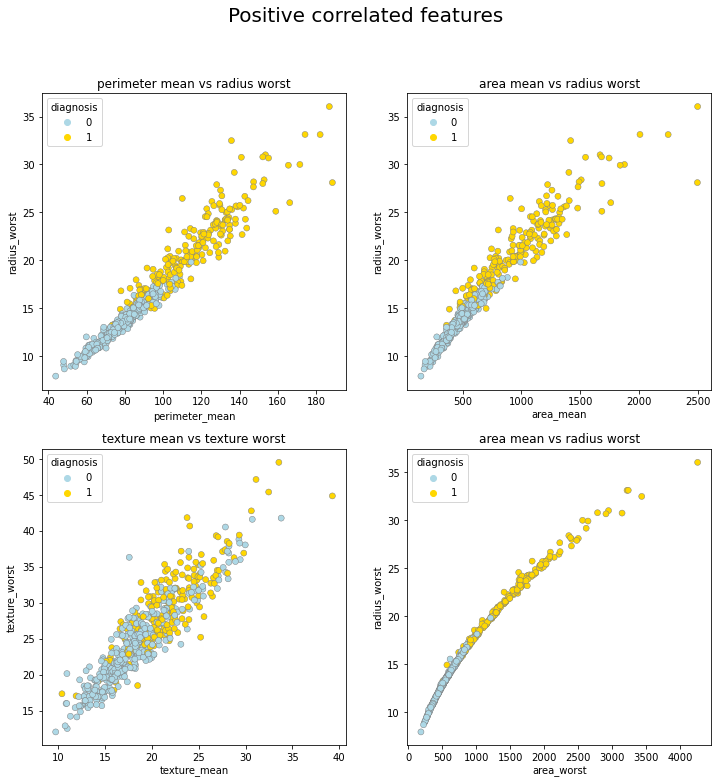

In [17]:
#seaborn version : 

palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['area_worst'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

## <a id='2.7'>2.6. Uncorrelated features</a>

In [18]:
plot_feat1_feat2('smoothness_mean','texture_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_worst')
plot_feat1_feat2('texture_mean','symmetry_mean')
plot_feat1_feat2('texture_mean','symmetry_se')

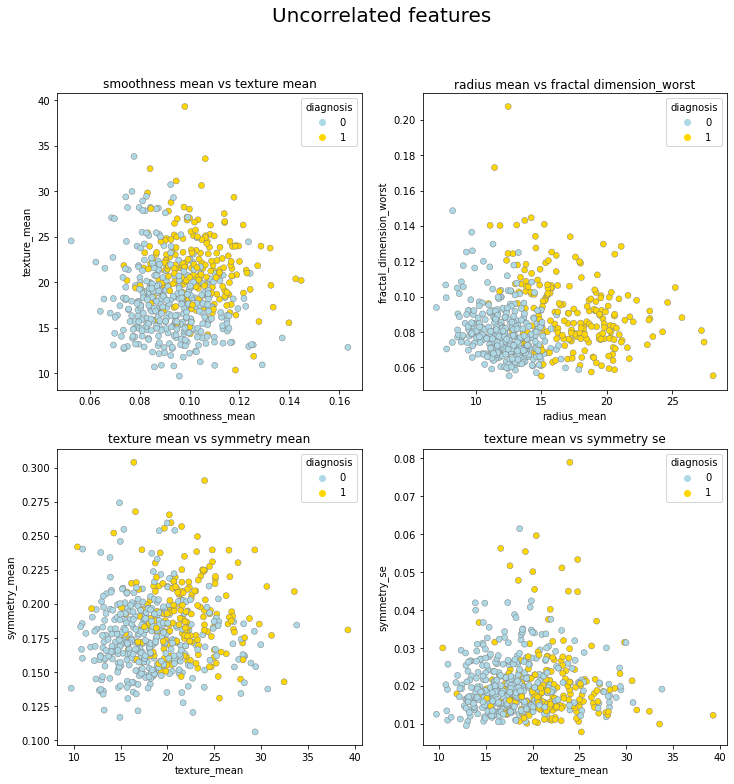

In [19]:
# seaborn version : 
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()

## <a id='2.7'>2.7. Negative correlated features</a>

In [20]:
plot_feat1_feat2('area_mean','fractal_dimension_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_mean')
plot_feat1_feat2('area_mean','smoothness_se')
plot_feat1_feat2('smoothness_se','perimeter_mean')

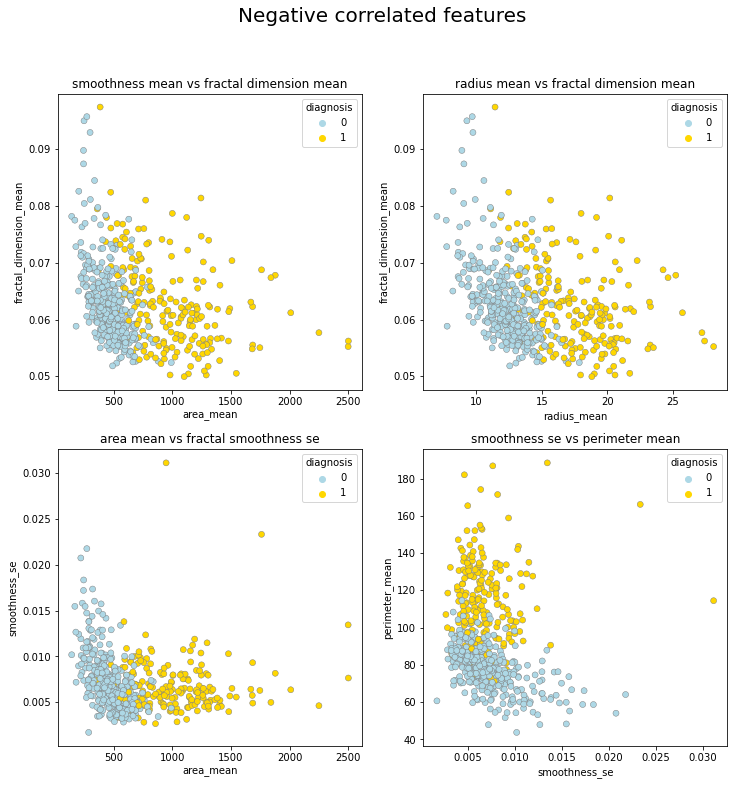

In [21]:
# seaborn version
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['area_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs fractal dimension mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension mean')
plt.subplot(223)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['smoothness_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs fractal smoothness se')
plt.subplot(224)
ax2 = sns.scatterplot(x = data['smoothness_se'], y = data['perimeter_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness se vs perimeter mean')

fig.suptitle('Negative correlated features', fontsize = 20)
plt.savefig('3')
plt.show()

# <a id='3'>3. Principal Component Analysis</a>

## <a href='#3.1'>3.1. Compute PCA</a>

In [22]:
target_pca = data['diagnosis']
data_pca = data.drop('diagnosis', axis=1)

target_pca = pd.DataFrame(target_pca)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

## <a id='3.2'>3.2. PCA pie plot with 6 components (88.8%)</a>

In [23]:
#explained_variance 
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
var_pca = var_pca.T

#----------SUM AND DROP COMP [7:30]
col_list = list(v for v in chain(pca_std.columns[6:30])) 
var_pca['OTHERS_COMP'] = var_pca[col_list].sum(axis=1)
var_pca.drop(var_pca[col_list],axis=1,inplace=True)
var_pca = var_pca.T

In [24]:
labels = ['COMP1','COMP2','COMP3','COMP4','COMP5','COMP6', 'COMP7 - 30']
colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white']

trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'PCA : components and explained variance (6 comp = 88.8%)')
 
                   
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

## <a id='3.2'>3.3. PCA scatter plot with 2 components (63.3%)</a>

In [25]:
pca = PCA(n_components = 2)

pca_std = pca.fit(X_std, target_pca).transform(X_std)
pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2'])
pca_std = pca_std.merge(target_pca,left_index = True,right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [26]:
def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_std[pca_std['diagnosis'] == target]['COMP1'] ,
                        y = pca_std[pca_std['diagnosis'] == target]['COMP2'],
                        name = target, mode = 'markers',
                        marker = dict(color = color,line = dict(width = 1))
                       )
    return tracer
layout = go.Layout(dict(title = 'PCA Scatter plot (2 comp = 63.3%)',
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP1 = 44.3%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = 'COMP2 = 19.0%',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 800
                       ))
trace1 = pca_scatter('malignant','#FFD700')
trace2 = pca_scatter('benign','#7EC0EE')
plots = [trace2,trace1]
fig = go.Figure(data = plots,layout = layout)
py.iplot(fig)

## <a id='#3.3'>3.4. PCA scatter plot with 3 components (72.7%)</a>

In [27]:
pca = PCA(n_components = 3)
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std,columns = ['COMP1','COMP2','COMP3'])
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True,how = 'left')
pca_std['diagnosis'] = pca_std['diagnosis'].replace({1:'malignant',0:'benign'})

In [28]:
M_pca = pca_std[(pca_std['diagnosis'] == 'malignant')]
B_pca = pca_std[(pca_std['diagnosis'] == 'benign')]

In [29]:
trace1 = go.Scatter3d(x = M_pca['COMP1'],
                      y = M_pca['COMP3'],
                      z = M_pca['COMP2'],
                      mode = "markers",
                      name = "malignant",
                      marker = dict(size = 4,color = '#FFD700',line = dict(width = 1))
                     )
trace2 = go.Scatter3d(x = B_pca['COMP1'],
                      y = B_pca['COMP3'],
                      z = B_pca['COMP2'],
                      name = 'benign',
                      mode = 'markers',
                      marker = dict(size = 4,color= '#7EC0EE',line = dict(width = 1))
                     )



layout = go.Layout(dict(title = 'PCA Scatter plot (3 comp = 72.7%)',
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = 'COMP1',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = 'COMP3',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = 'COMP2',
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )),height = 700))
                  

plots = [trace1,trace2]
fig  = go.Figure(data = plots,layout = layout)
py.iplot(fig)

# <a id='4'>4. Define functions</a>

This part is essential to measure the performance of a model : roc, cross validation, learning curve ...

## <a id='4.1'>4.1. Confusion matrix and show metrics</a>

The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :
* true positive (TP) : Malignant tumour correctly identified as malignant
* true negative (TN) : Benign tumour correctly identified as benign
* false positive (FP) : Benign tumour incorrectly identified as malignant 
* false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics : 
* Accuracy : (TP +TN) / (TP + TN + FP +FN)
* Precision : TP / (TP + FP)
* Recall : TP / (TP + FN)


In [30]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Show metrics 
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

## <a id='4.2'>4.2. Precision – Recall curve</a>

The precision-recall curve shows the tradeoff between precision and recall for different threshold

In [31]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

## <a id='4.3'>4.3. ROC curve</a>

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [32]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
   # plt.xlim([0.0,0.001])
   # plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

## <a id='4.4'>4.4. Learning curve</a>

The Learning curve determines cross-validated training and test scores.

In [33]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

 ## <a id='4.5'>4.5. Cross validation metrics</a>

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. 

In [34]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

# <a id='5'>5. Prepare dataset</a>

## <a id='5.1'>5.1. Define (X,  y)</a>

* y = diagnosis (target)
* X = features (radius_mean, area_se, ....) 


In [35]:
# Def X and Y
y = np.array(data.diagnosis.tolist())
data = data.drop('diagnosis', 1)
X = np.array(data.values)

## <a id='5.2'>5.2. Standard scaler (X)</a>

Why do you need to standardize your data ?  For example, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization in effect gives the variable with the larger range a bigger weight in the analysis

In [36]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

## <a id='5.3'>5.3. Train test split</a>

In [37]:
# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = random_state)

 # <a id='6'>6. Predictive model : Logistic Regression</a>

## <a id='6.1'>6.1. Logistic Regression  and GridSearch CV to optimise hyperparameters (accuracy)</a>

In [38]:
# Find best hyperparameters (accuracy)
log_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 0.1, 'penalty': 'l2'}


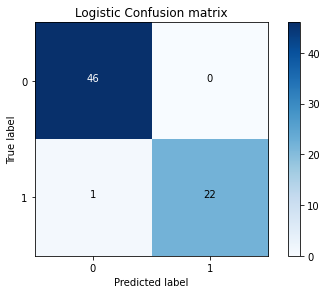

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.957
F1_score  =     0.978


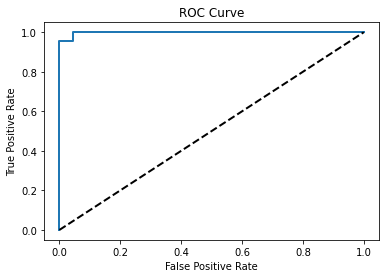

In [39]:
#Log with best hyperparameters
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf.fit(X_train, y_train)
y_pred = CV_log_clf.predict(X_test)
y_score = CV_log_clf.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

## <a id='6.2'>6.2. RFE : Recursive features elimination (30 features => 15 features)</a>

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s coef_ or feature_importances_

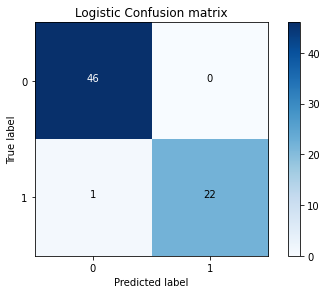

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.957
F1_score  =     0.978


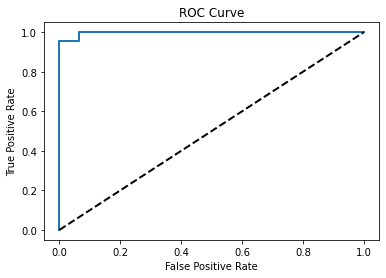

In [40]:
#Logistic regression with RFE
log_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)

selector = RFE(log_clf)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [41]:
# support and ranking RFE
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True False False False  True False False  True False
 False  True False False False False False False  True  True  True  True
  True False  True  True  True False]
[ 1  1  1  1  8 16  4  1 12  6  1 15  2  1 13  5 14 10  9  3  1  1  1  1
  1  7  1  1  1 11]


## <a id='6.3'>6.3. Compare learning curves and cross validation scores</a> 

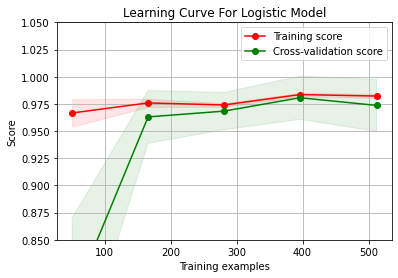

In [42]:
#Learning curve Log with best hyperpara
plot_learning_curve(CV_log_clf, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()

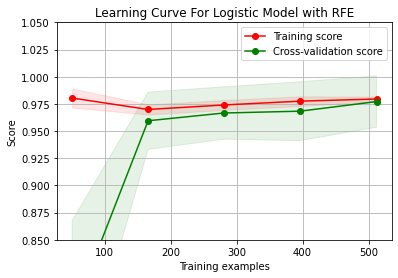

In [43]:
#Learning curve Log with RFE
plot_learning_curve(selector, 'Learning Curve For Logistic Model with RFE', X, y, (0.85,1.05), 10)
plt.show()

In [44]:
# Cross val Log 
cross_log = cross_val_metrics(CV_log_clf)

[accuracy] : 0.97541 (+/- 0.00653)
[precision] : 0.99024 (+/- 0.01196)
[recall] : 0.94352 (+/- 0.01856)


In [45]:
# Cross val Log with RFE
cross_selector = cross_val_metrics(selector)

[accuracy] : 0.97365 (+/- 0.01107)
[precision] : 0.98524 (+/- 0.01206)
[recall] : 0.94352 (+/- 0.02368)


With only 15 features and 5 folds, we got an accuracy of 97.4 with a standard deviation of 0.78.
To follow, we don't use the selector, the log cfl is most performant but the code is here for you :)

## <a href='#6.4'>6.4. Select threshold for a recall = 100% (all malignant tumors detected)</a>

For this study, the most important is to detect all malignants tumours. 

Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 0.9565217391304348
Recall w/ threshold = 0.3 : 0.9565217391304348
Recall w/ threshold = 0.4 : 0.9565217391304348
Recall w/ threshold = 0.5 : 0.9565217391304348
Recall w/ threshold = 0.6 : 0.9565217391304348
Recall w/ threshold = 0.7 : 0.9565217391304348
Recall w/ threshold = 0.8 : 0.8260869565217391
Recall w/ threshold = 0.9 : 0.782608695652174


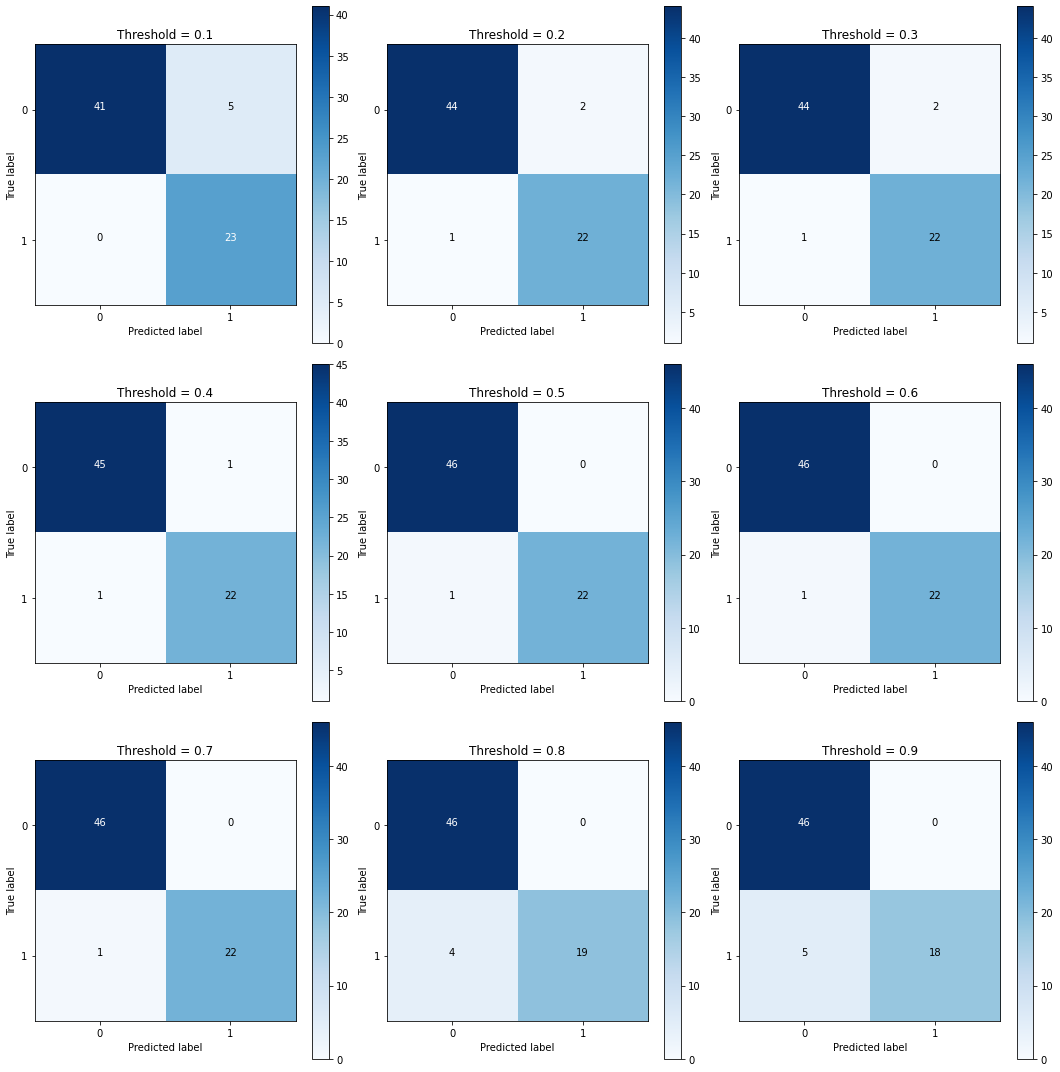

In [46]:
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = CV_log_clf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

## <a href='#6.5'>6.5. Predicting with recall = 100%</a>

In [47]:
# Recall = 1.
y_score = CV_log_clf.predict_proba(X_test)[:,1] > 0.1
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
show_metrics()

Accuracy  =     0.928
Precision =     0.821
Recall    =     1.000
F1_score  =     0.902


With 2 models we can increase the precision while keeping a recall = 100%

 # <a id='7'>7. Predictive model 2 : Ensemble Classifier to maximise precision and detect all malignant tumors</a>

## <a id='7.1'>7.1. Logistic Regression  and GridSearch CV to optimise hyperparameters (recall)</a>

In [48]:
# Find the best parameters (recall)
log2_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            }

CV_log2_clf = GridSearchCV(estimator = log2_clf, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log2_clf.fit(X_train, y_train)

best_parameters = CV_log2_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
The best parameters for using this model is {'C': 1, 'penalty': 'l2'}


In [49]:
# Log w best hyperparameters (recall)
CV_log2_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)


CV_log2_clf.fit(X_train, y_train)

y_pred = CV_log2_clf.predict(X_test)
y_score = CV_log2_clf.decision_function(X_test)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]

* Grid search CV accuracy, penalty = l2
* Grid search CV recall,  penalty = l1

In [50]:
# Cross val log2
cross_val_metrics(CV_log2_clf)

[accuracy] : 0.98069 (+/- 0.00654)
[precision] : 0.98582 (+/- 0.01159)
[recall] : 0.96224 (+/- 0.02426)


## <a id='7.2'>7.2. Voting classifier : log + log2</a> 

In [51]:
#Voting Classifier
voting_clf = VotingClassifier (
        estimators = [('log1', CV_log_clf), ('log_2', CV_log2_clf)],
                     voting='soft', weights = [1, 1])
    
voting_clf.fit(X_train,y_train)

y_pred = voting_clf.predict(X_test)
y_score = voting_clf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
show_metrics()

Accuracy  =     0.986
Precision =     1.000
Recall    =     0.957
F1_score  =     0.978


In [52]:
# Cross val score voting
cross_voting = cross_val_metrics(voting_clf)

[accuracy] : 0.97893 (+/- 0.00892)
[precision] : 0.98559 (+/- 0.01178)
[recall] : 0.95759 (+/- 0.02324)


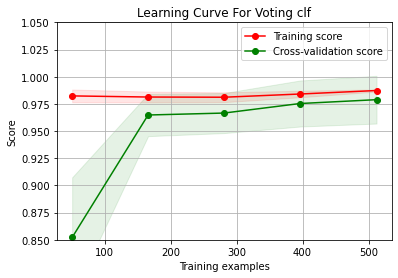

In [53]:
#Learning curve Voting
plot_learning_curve(voting_clf, 'Learning Curve For Voting clf', X, y, (0.85,1.05), 10)
plt.savefig('9')
plt.show()

 ## <a id='7.3'>7.3. Voting classifier : select threshold (recall = 100%)</a>

Recall w/ threshold = 0.1 : 1.0
Recall w/ threshold = 0.2 : 0.9565217391304348
Recall w/ threshold = 0.3 : 0.9565217391304348
Recall w/ threshold = 0.4 : 0.9565217391304348
Recall w/ threshold = 0.5 : 0.9565217391304348
Recall w/ threshold = 0.6 : 0.9565217391304348
Recall w/ threshold = 0.7 : 0.9565217391304348
Recall w/ threshold = 0.8 : 0.9130434782608695
Recall w/ threshold = 0.9 : 0.8260869565217391


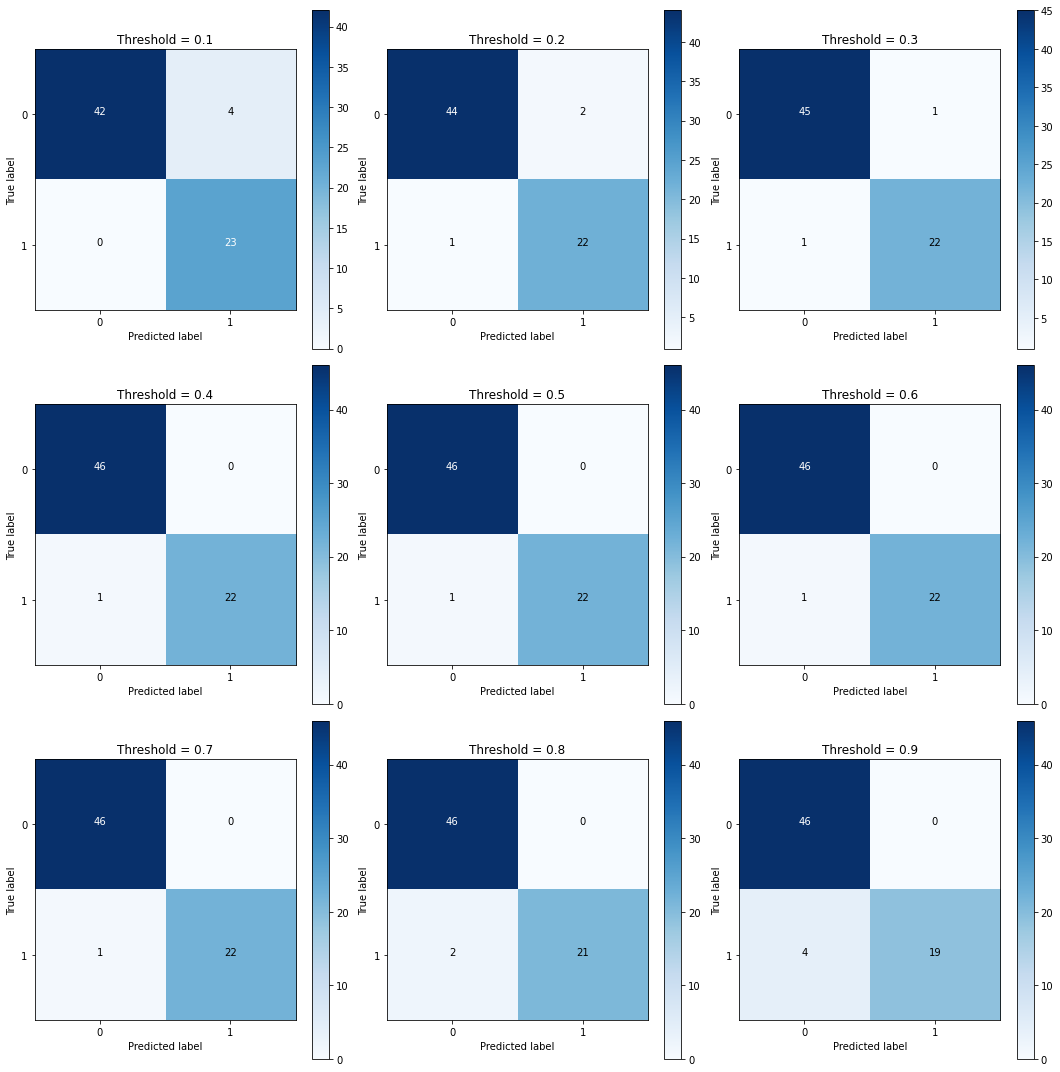

In [54]:
# Threshold
thresholds_adj = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize = (15,15))

j = 1
for i in thresholds_adj:
    y_score = voting_clf.predict_proba(X_test)[:,1] > i
    
    
    plt.subplot(3,3,j)
    j += 1
    
    cm = confusion_matrix(y_test, y_score)
    
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]

    print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))
    
    class_names = [0,1]
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title='Threshold = %s'%i) 

## <a id='7.4'>7.4. Voting classifier : predicting with recall = 100% (precision = 92%)</a>

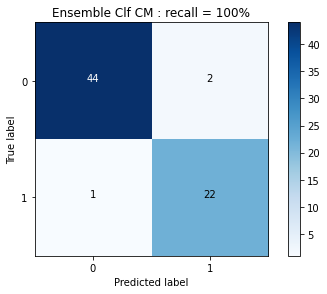

Accuracy  =     0.957
Precision =     0.917
Recall    =     0.957
F1_score  =     0.936


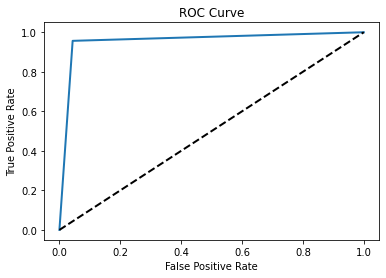

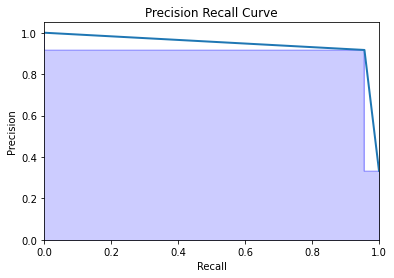

In [55]:
# Ensemble, recall = 1.
y_score = voting_clf.predict_proba(X_test)[:,1] > 0.23
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'Ensemble Clf CM : recall = 100%')
plt.savefig('8')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

## <a id='7.5'>7.5. Models performance plot (accuracy, precision, recall)</a>

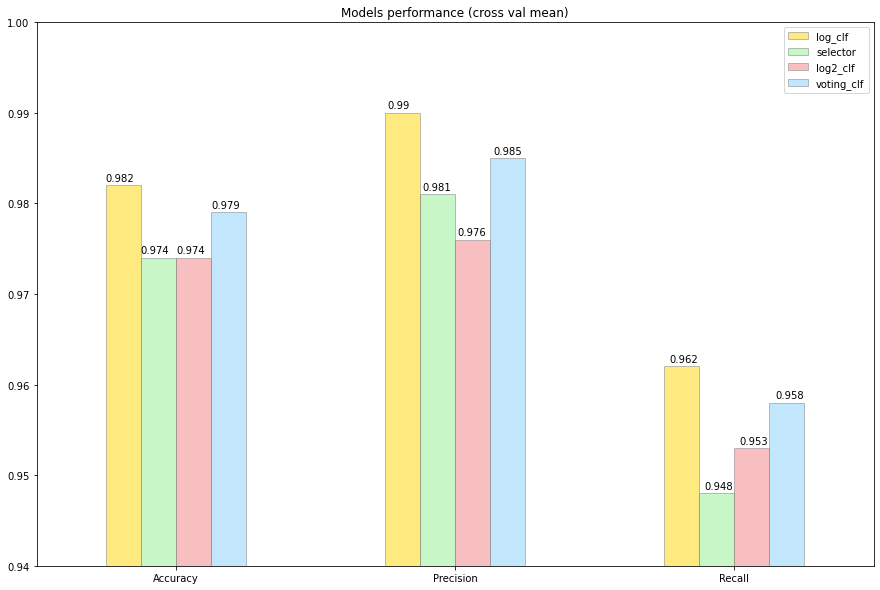

In [56]:
models_metrics = {'log_clf': [0.982, 0.990, 0.962], 
                 'selector': [0.974, 0.981, 0.948],
                 'log2_clf' : [0.974,0.976,0.953],
                 'voting_clf' : [0.979,0.985,0.958]
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall'}, 
                 inplace=True)
ax = df.plot(kind='bar', figsize = (15,10), ylim = (0.94, 1), 
        color = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()